In [93]:
import pandas as pd

In [94]:
df = pd.read_csv("iris.csv")

In [95]:
df.shape

(150, 6)

In [96]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [98]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [100]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [101]:
y = df.Species

In [102]:
x= df.drop(columns=["Species", "Id"])

In [103]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [106]:
lr.fit(x,y)

LogisticRegression()

In [107]:
lr.score(x,y)

0.9733333333333334

In [108]:
lr.predict([x.iloc[4]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [109]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [110]:
lr.coef_

array([[-0.42340128,  0.96171383, -2.51952248, -1.08592601],
       [ 0.53415829, -0.31797653, -0.20537738, -0.93967979],
       [-0.110757  , -0.6437373 ,  2.72489986,  2.0256058 ]])

In [111]:
lr.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [112]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

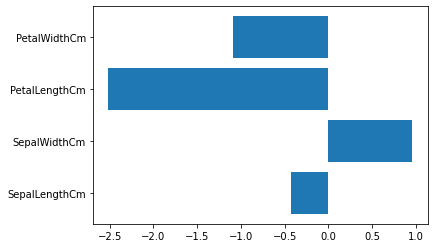

In [113]:
plt.barh(x.columns,lr.coef_[0])

<BarContainer object of 4 artists>

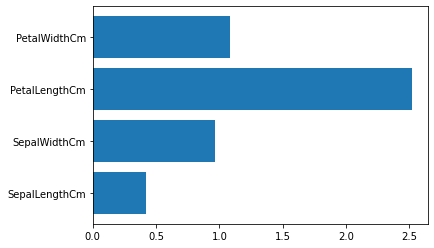

In [114]:
plt.barh(x.columns,[abs(x) for x in lr.coef_[0]])

In [115]:
lr.predict([x.iloc[0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [116]:
lr.predict_proba([x.iloc[0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.81805544e-01, 1.81944418e-02, 1.43384749e-08]])

In [119]:
[[round(float(j),3) for j in lr.predict_proba([x.iloc[128]])[0]]]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[0.0, 0.036, 0.964]]

In [118]:
lr.predict([x.loc[128]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# Computing Accuracy Manually

In [120]:
df['predicated_Species'] = lr.predict(x)

In [121]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicated_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [123]:
df['Error'] = df.Species == df.predicated_Species

In [124]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicated_Species,Error
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,True
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,True
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,True
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,True
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,True


In [125]:
df.Error.value_counts()

True     146
False      4
Name: Error, dtype: int64

In [126]:
146/(146+4)

0.9733333333333334